In [ ]:
-# -----------------------------------------------
# STEP 1: Import Required Libraries
# -----------------------------------------------
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# -----------------------------------------------
# STEP 2: Load the Dataset
# -----------------------------------------------
# Upload manually using Google Colab file uploader
from google.colab import files
uploaded = files.upload()

# Replace with your actual filename (after upload)
df = pd.read_csv('crop_yield_dataset.csv')  # adjust name if different

# Display basic info
print("Dataset Info:\n")
print(df.info())
print("\nSample Rows:\n")
display(df.head())

# -----------------------------------------------
# STEP 3: Date Conversion and Feature Extraction
# -----------------------------------------------
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# -----------------------------------------------
# STEP 4: Encode Categorical Variables
# -----------------------------------------------
le_crop = LabelEncoder()
le_soil = LabelEncoder()

df['Crop_Type'] = le_crop.fit_transform(df['Crop_Type'])
df['Soil_Type'] = le_soil.fit_transform(df['Soil_Type'])

# -----------------------------------------------
# STEP 5: Check and Fill Missing Values
# -----------------------------------------------
print("\nMissing Values:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)

# -----------------------------------------------
# STEP 6: Remove Rows with Zero Crop Yield (if needed)
# -----------------------------------------------
df = df[df['Crop_Yield'] > 0]

# -----------------------------------------------
# STEP 7: Handle Outliers (optional)
# -----------------------------------------------
for col in ['Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K']:
    df[col] = df[col].clip(df[col].quantile(0.01), df[col].quantile(0.99))

# -----------------------------------------------
# STEP 8: Feature Scaling
# -----------------------------------------------
scaler = StandardScaler()
num_cols = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed',
            'N', 'P', 'K', 'Soil_Quality']

df[num_cols] = scaler.fit_transform(df[num_cols])

# -----------------------------------------------
# STEP 9: Split into Features and Target
# -----------------------------------------------
X = df.drop('Crop_Yield', axis=1)
y = df['Crop_Yield']

# -----------------------------------------------
# STEP 10: Train-Test Split
# -----------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n✅ Preprocessing Complete!")
print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Saving crop_yield_dataset.csv to crop_yield_dataset (3).csv
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB
None

Sample Rows:



,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667



Missing Values:
 Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
Year            0
Month           0
Day             0
dtype: int64

✅ Preprocessing Complete!
Training Set Shape: (20396, 13)
Testing Set Shape: (5099, 13)


In [ ]:
df.shape

(25495, 14)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV file from your system

# Replace with your uploaded filename
df = pd.read_csv(list(uploaded.keys())[0])

print("✅ Dataset successfully loaded!\n")
print("Dataset shape:", df.shape)
display(df.head())

Saving crop_yield_dataset.csv to crop_yield_dataset.csv
✅ Dataset successfully loaded!

Dataset shape: (36520, 12)


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_yield_dataset.csv to crop_yield_dataset (1).csv


In [ ]:
import os

# List uploaded files
os.listdir('/content')


['.config',
 'crop_yield_dataset.csv',
 'crop_yield_dataset (1).csv',
 'sample_data']

In [ ]:
['crop_yield_dataset.csv', 'sample_data']


['crop_yield_dataset.csv', 'sample_data']

In [ ]:
import shutil

source = list(uploaded.keys())[0]        # get the uploaded filename
destination = '/content/crop_yield_dataset.csv'  # choose your name
shutil.move(source, destination)

print("✅ File saved inside Colab at:", destination)


✅ File saved inside Colab at: /content/crop_yield_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/crop_yield_dataset.csv')
df.head()


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
df.to_csv('/content/cleaned_crop_yield.csv', index=False)
print("✅ Cleaned dataset saved as /content/cleaned_crop_yield.csv")


✅ Cleaned dataset saved as /content/cleaned_crop_yield.csv


In [ ]:
df_cleaned = pd.read_csv('/content/cleaned_crop_yield.csv')


In [ ]:
from google.colab import files
files.download('/content/cleaned_crop_yield.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(36520, 12)

In [ ]:
df.dtypes

,0
Date,object
Crop_Type,object
Soil_Type,object
Soil_pH,float64
Temperature,float64
Humidity,float64
Wind_Speed,float64
N,float64
P,float64
K,float64


In [ ]:
df.describe()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.816973,8.920519,6.767587,2.998310,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,8.000000,54.148911,80.000000,22.606078,91.000000,72.000000,60.00000,136.711982,74.333333


In [ ]:
df.isnull().sum()

,0
Date,0
Crop_Type,0
Soil_Type,0
Soil_pH,0
Temperature,0
Humidity,0
Wind_Speed,0
N,0
P,0
K,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Crop_Type'].unique()

array(['Wheat', 'Corn', 'Rice', 'Barley', 'Soybean', 'Cotton',
       'Sugarcane', 'Tomato', 'Potato', 'Sunflower'], dtype=object)

In [ ]:
df['Soil_Type'].nunique()

5

In [ ]:
df.groupby('Soil_Type')['Crop_Yield'].mean()

,Crop_Yield
Soil_Type,
Clay,29.199383
Loamy,36.523071
Peaty,21.992942
Saline,23.504590
Sandy,23.199531


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Crop_Type'].unique()

array(['Wheat', 'Corn', 'Rice', 'Barley', 'Soybean', 'Cotton',
       'Sugarcane', 'Tomato', 'Potato', 'Sunflower'], dtype=object)

In [ ]:
df.groupby('Soil_Type')['Crop_Yield'].mean()

,Crop_Yield
Soil_Type,
Clay,29.199383
Loamy,36.523071
Peaty,21.992942
Saline,23.504590
Sandy,23.199531


In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload from your local computer
print("📤 Please upload your CSV file")
uploaded = files.upload()

# Get file name and load into pandas
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"✅ '{file_name}' uploaded and loaded successfully!")
df.head()


📤 Please upload your CSV file


Saving crop_yield_dataset.csv to crop_yield_dataset.csv
✅ 'crop_yield_dataset.csv' uploaded and loaded successfully!


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
print("🧾 Dataset Info:")
df.info()

print("\n📊 Summary Statistics:")
display(df.describe(include='all'))

print("\n🔍 Missing Values:")
display(df.isnull().sum())


🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB

📊 Summary Statistics:


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520,36520,36520,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
unique,3652,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-12-31,Wheat,Saline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,3652,7361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
std,NaN,NaN,NaN,0.816973,8.920519,6.767587,2.998310,10.886721,8.812884,8.53781,25.740936,17.703171
min,NaN,NaN,NaN,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,NaN,NaN,NaN,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,NaN,NaN,NaN,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,NaN,NaN,NaN,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667



🔍 Missing Values:


,0
Date,0
Crop_Type,0
Soil_Type,0
Soil_pH,0
Temperature,0
Humidity,0
Wind_Speed,0
N,0
P,0
K,0


In [ ]:

df.fillna(df.mean(numeric_only=True), inplace=True)

df.fillna("Unknown", inplace=True)

print("✅ Missing values cleaned successfully!")


✅ Missing values cleaned successfully!


In [ ]:
cleaned_path = "/content/cleaned_crop_yield.csv"
df.to_csv(cleaned_path, index=False)
print(f"✅ Cleaned dataset saved at: {cleaned_path}")


✅ Cleaned dataset saved at: /content/cleaned_crop_yield.csv


In [ ]:
df.columns


Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt


category_col = 'Crop'          # categorical column
numeric_col = 'Production'     # numeric column

if category_col in df.columns and numeric_col in df.columns:
    plt.figure(figsize=(10,5))
    df.groupby(category_col)[numeric_col].mean().sort_values().plot(kind='bar')
    plt.title(f'Average {numeric_col} by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel(f'Average {numeric_col}')
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"⚠️ Columns '{category_col}' and/or '{numeric_col}' not found. Available columns:")
    print(list(df.columns))


⚠️ Columns 'Crop' and/or 'Production' not found. Available columns:
['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


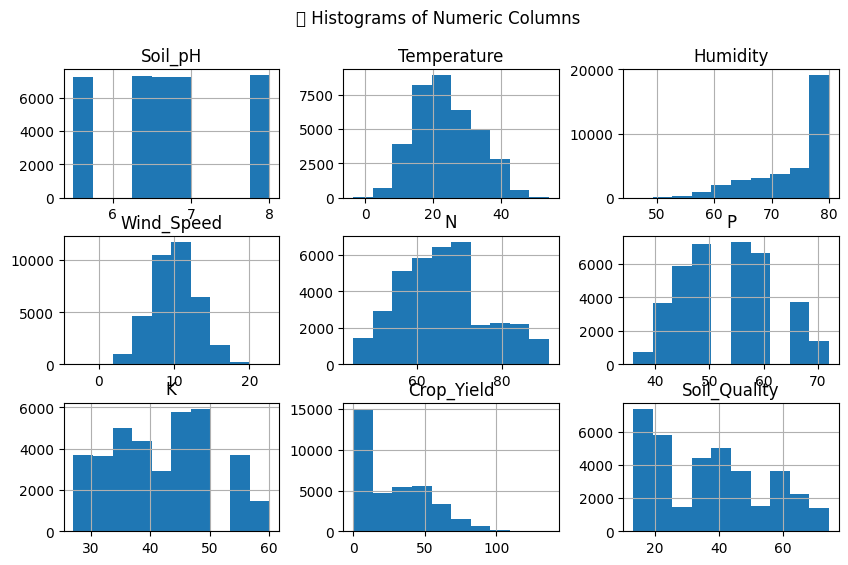

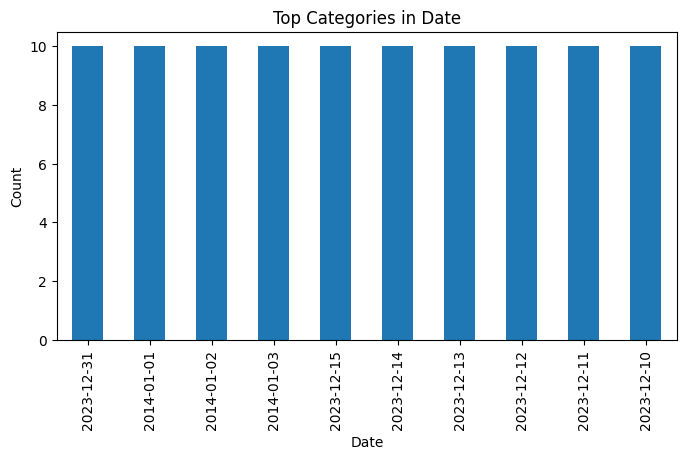

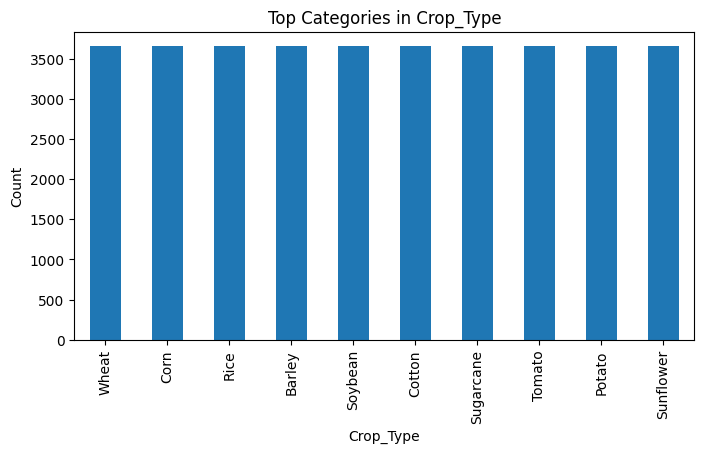

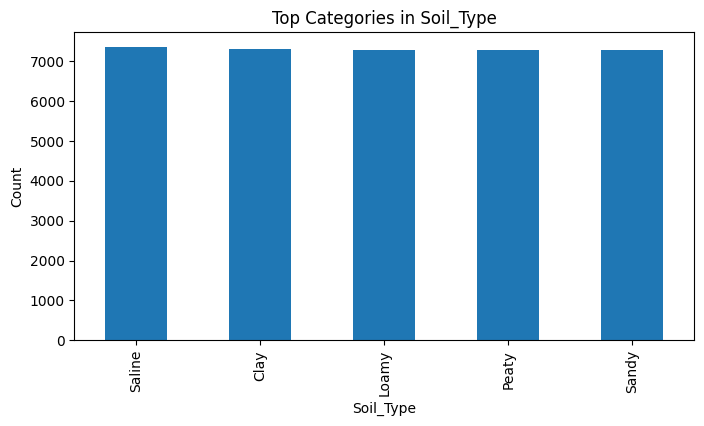

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 6))
plt.suptitle("📊 Histograms of Numeric Columns")
plt.show()


categorical_cols = df.select_dtypes(include='object').columns[:3]
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_yield_dataset.csv to crop_yield_dataset (1).csv


In [ ]:
import pandas as pd

data = pd.read_csv("crop_yield_dataset.csv")
data.head()


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


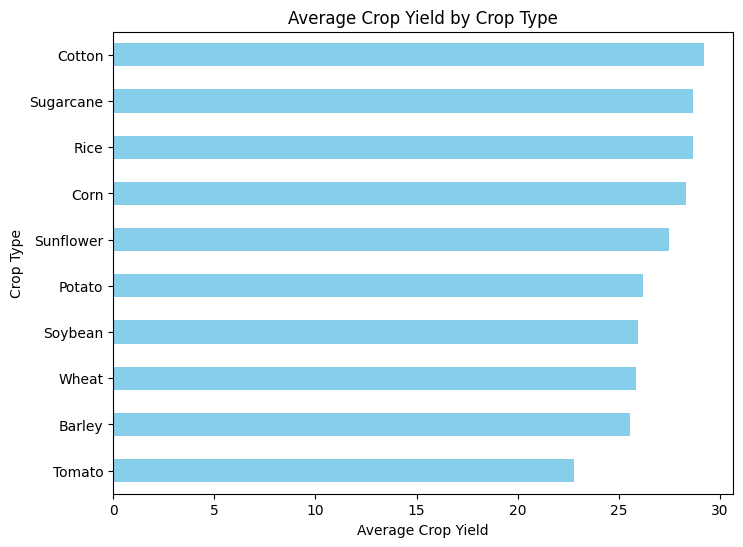

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean yield for each crop type
avg_yield = data.groupby("Crop_Type")["Crop_Yield"].mean().sort_values()

# Plot
plt.figure(figsize=(8,6))
avg_yield.plot(kind="barh", color="skyblue")
plt.xlabel("Average Crop Yield")
plt.ylabel("Crop Type")
plt.title("Average Crop Yield by Crop Type")
plt.show()


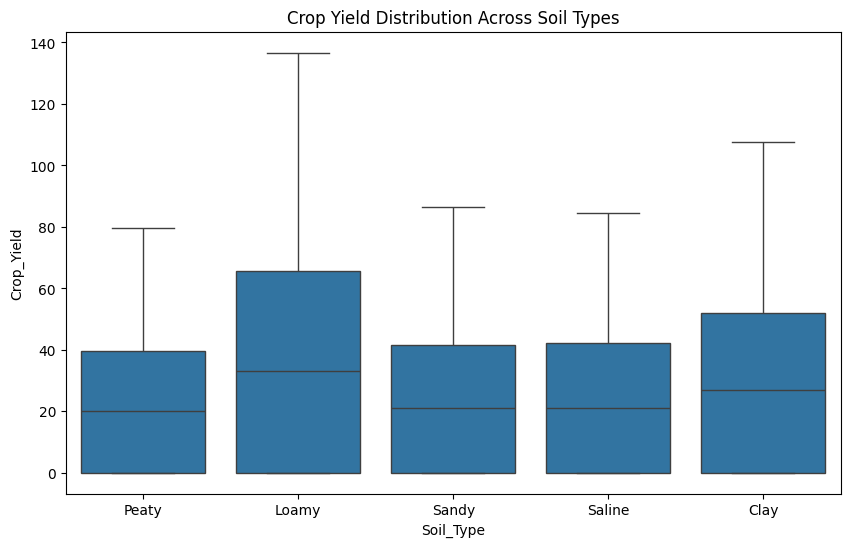

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Soil_Type", y="Crop_Yield", data=data)
plt.title("Crop Yield Distribution Across Soil Types")
plt.show()


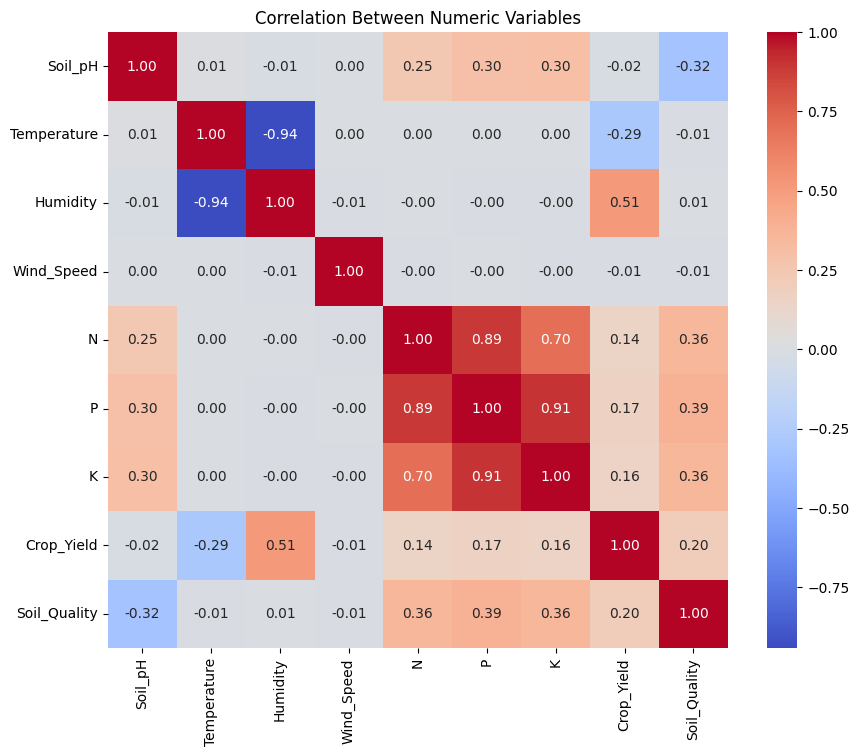

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Variables")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_yield_dataset (1).csv to crop_yield_dataset (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_yield_dataset.csv to crop_yield_dataset (2).csv


In [ ]:
import pandas as pd

data = pd.read_csv("crop_yield_dataset.csv")
data.head()


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, Normalizer,
    OneHotEncoder, OrdinalEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [ ]:

data = pd.read_csv("crop_yield_dataset.csv")


print("✅ Dataset Loaded Successfully!\n")
print("📋 Columns available in dataset:")
print(list(data.columns))
data.head()


✅ Dataset Loaded Successfully!

📋 Columns available in dataset:
['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:

target_col = "Crop_Yield"

if target_col not in data.columns:
    raise ValueError(f"⚠️ Column '{target_col}' not found! Please change 'target_col' to one of: {list(data.columns)}")

X = data.drop(target_col, axis=1)
y = data[target_col]

num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()

print("🔢 Numeric columns:", num_cols)
print("🔤 Categorical columns:", cat_cols)


🔢 Numeric columns: ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']
🔤 Categorical columns: ['Date', 'Crop_Type', 'Soil_Type']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Split complete:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


✅ Split complete:
X_train shape: (29216, 11)
X_test shape: (7304, 11)


In [ ]:

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer()
}

encoders = {
    "OneHotEncoder": OneHotEncoder(handle_unknown="ignore", sparse_output=False),
    "OrdinalEncoder": OrdinalEncoder()
}


In [ ]:

pipelines = {}

for scaler_name, scaler in scalers.items():
    for encoder_name, encoder in encoders.items():
        preprocessor = ColumnTransformer(transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", scaler)
            ]), num_cols),

            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", encoder)
            ]), cat_cols)
        ])

        pipelines[f"{scaler_name}_{encoder_name}"] = preprocessor

print("✅ Created preprocessing pipelines:")
for name in pipelines.keys():
    print("-", name)


✅ Created preprocessing pipelines:
- StandardScaler_OneHotEncoder
- StandardScaler_OrdinalEncoder
- MinMaxScaler_OneHotEncoder
- MinMaxScaler_OrdinalEncoder
- RobustScaler_OneHotEncoder
- RobustScaler_OrdinalEncoder
- Normalizer_OneHotEncoder
- Normalizer_OrdinalEncoder


In [ ]:

example_pipeline = pipelines["StandardScaler_OneHotEncoder"]

X_train_processed = example_pipeline.fit_transform(X_train)
X_test_processed = example_pipeline.transform(X_test)

print("✅ Preprocessing completed successfully!")
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)


✅ Preprocessing completed successfully!
X_train_processed shape: (29216, 3675)
X_test_processed shape: (7304, 3675)


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np


In [ ]:

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42)
}


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

for col in X.select_dtypes(include=['datetime64', 'object']).columns:
    try:
        X[col] = pd.to_datetime(X[col], errors='coerce')
        if X[col].notnull().any():
            X[col + '_year'] = X[col].dt.year
            X[col + '_month'] = X[col].dt.month
            X[col + '_day'] = X[col].dt.day
            X.drop(columns=[col], inplace=True)
    except Exception:
        pass

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}

encoders = {
    "OneHotEncoder": OneHotEncoder(handle_unknown='ignore'),
    "OrdinalEncoder": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
}

models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42)
}

pipelines = {}
for scaler_name, scaler in scalers.items():
    for encoder_name, encoder in encoders.items():
        preprocessor = ColumnTransformer([
            ("num", scaler, numeric_features),
            ("cat", encoder, categorical_features)
        ])
        pipelines[f"{scaler_name}_{encoder_name}"] = preprocessor

results = []
selected_pipelines = ["StandardScaler_OneHotEncoder", "MinMaxScaler_OrdinalEncoder"]
selected_models = ["LinearRegression", "RandomForestRegressor"]

for pipeline_name in selected_pipelines:
    preprocessor = pipelines[pipeline_name]
    X_train_sample = X_train.sample(min(500, len(X_train)), random_state=42)
    y_train_sample = y_train.loc[X_train_sample.index]
    X_test_sample = X_test.sample(min(200, len(X_test)), random_state=42)
    y_test_sample = y_test.loc[X_test_sample.index]
    X_train_prep = preprocessor.fit_transform(X_train_sample)
    X_test_prep = preprocessor.transform(X_test_sample)
    for model_name in selected_models:
        model = models[model_name]
        model.fit(X_train_prep, y_train_sample)
        y_pred = model.predict(X_test_prep)
        mae = mean_absolute_error(y_test_sample, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_sample, y_pred))
        r2 = r2_score(y_test_sample, y_pred)
        results.append({
            "Pipeline": pipeline_name,
            "Model": model_name,
            "MAE": mae,
            "RMSE": rmse,
            "R2_Score": r2
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="R2_Score", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Pipeline,Model,MAE,RMSE,R2_Score
0,StandardScaler_OneHotEncoder,RandomForestRegressor,7.404923,11.180383,0.821137
1,MinMaxScaler_OrdinalEncoder,RandomForestRegressor,7.422218,11.191439,0.820783
2,StandardScaler_OneHotEncoder,LinearRegression,11.729021,15.422949,0.659637
3,MinMaxScaler_OrdinalEncoder,LinearRegression,11.729021,15.422949,0.659637


✅ Model comparison completed successfully!
                       Pipeline                  Model        MAE       RMSE  \
0  StandardScaler_OneHotEncoder  RandomForestRegressor   7.404923  11.180383   
1   MinMaxScaler_OrdinalEncoder  RandomForestRegressor   7.422218  11.191439   
2  StandardScaler_OneHotEncoder       LinearRegression  11.729021  15.422949   
3   MinMaxScaler_OrdinalEncoder       LinearRegression  11.729021  15.422949   

   R2_Score  
0  0.821137  
1  0.820783  
2  0.659637  
3  0.659637  


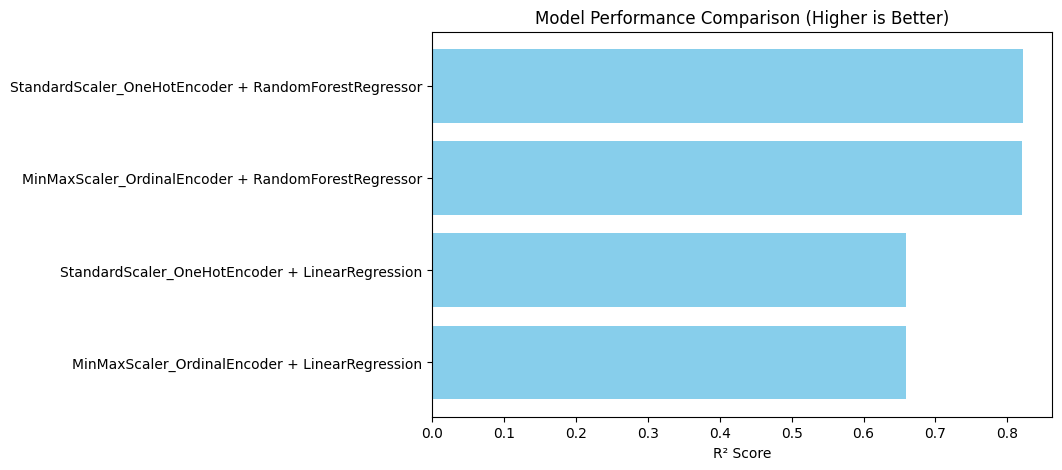

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

for col in X.select_dtypes(include=['datetime64', 'object']).columns:
    try:
        X[col] = pd.to_datetime(X[col], errors='coerce')
        if X[col].notnull().any():
            X[col + '_year'] = X[col].dt.year
            X[col + '_month'] = X[col].dt.month
            X[col + '_day'] = X[col].dt.day
            X.drop(columns=[col], inplace=True)
    except Exception:
        pass

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler()
}

encoders = {
    "OneHotEncoder": OneHotEncoder(handle_unknown='ignore'),
    "OrdinalEncoder": OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
}

models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42)
}

pipelines = {}
for scaler_name, scaler in scalers.items():
    for encoder_name, encoder in encoders.items():
        preprocessor = ColumnTransformer([
            ("num", scaler, numeric_features),
            ("cat", encoder, categorical_features)
        ])
        pipelines[f"{scaler_name}_{encoder_name}"] = preprocessor

results = []
selected_pipelines = ["StandardScaler_OneHotEncoder", "MinMaxScaler_OrdinalEncoder"]
selected_models = ["LinearRegression", "RandomForestRegressor"]

for pipeline_name in selected_pipelines:
    preprocessor = pipelines[pipeline_name]
    X_train_sample = X_train.sample(min(500, len(X_train)), random_state=42)
    y_train_sample = y_train.loc[X_train_sample.index]
    X_test_sample = X_test.sample(min(200, len(X_test)), random_state=42)
    y_test_sample = y_test.loc[X_test_sample.index]
    X_train_prep = preprocessor.fit_transform(X_train_sample)
    X_test_prep = preprocessor.transform(X_test_sample)
    for model_name in selected_models:
        model = models[model_name]
        model.fit(X_train_prep, y_train_sample)
        y_pred = model.predict(X_test_prep)
        mae = mean_absolute_error(y_test_sample, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_sample, y_pred))
        r2 = r2_score(y_test_sample, y_pred)
        results.append({
            "Pipeline": pipeline_name,
            "Model": model_name,
            "MAE": mae,
            "RMSE": rmse,
            "R2_Score": r2
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="R2_Score", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
print("✅ Model comparison completed successfully!")
print(results_df)

plt.figure(figsize=(8,5))
plt.barh(results_df["Pipeline"] + " + " + results_df["Model"], results_df["R2_Score"], color='skyblue')
plt.xlabel("R² Score")
plt.title("Model Performance Comparison (Higher is Better)")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Load dataset
data = pd.read_csv("crop_yield_dataset.csv")

# Drop rows with missing target
data = data.dropna(subset=['Crop_Yield'])

# Separate features and target
X = data.drop('Crop_Yield', axis=1)
y = data['Crop_Yield']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Results:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")
    return r2

# Train and evaluate all models
results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    results[name] = evaluate(y_test, preds, name)

# Compare performance
print("\n🏆 Model Performance Summary:")
for model_name, score in results.items():
    print(f"{model_name}: R² = {score:.3f}")

# Select best models (Random Forest & XGBoost) for hyperparameter tuning
best_models = ['Random Forest', 'XGBoost']

# Random Forest Tuning
rf_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15, None],
    'model__min_samples_split': [2, 5, 10]
}

rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', RandomForestRegressor(random_state=42))])

rf_search = RandomizedSearchCV(rf_pipe, rf_params, n_iter=5, cv=3, scoring='r2', random_state=42, verbose=1)
rf_search.fit(X_train, y_train)
print("\n🎯 Best Random Forest Params:", rf_search.best_params_)

# XGBoost Tuning
xgb_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 0.9, 1.0]
}

xgb_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', XGBRegressor(random_state=42, objective='reg:squarederror'))])

xgb_search = RandomizedSearchCV(xgb_pipe, xgb_params, n_iter=5, cv=3, scoring='r2', random_state=42, verbose=1)
xgb_search.fit(X_train, y_train)
print("\n🎯 Best XGBoost Params:", xgb_search.best_params_)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



📊 Linear Regression Results:
MAE: 0.213
RMSE: 0.213
R² Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



📊 Random Forest Results:
MAE: 0.194
RMSE: 0.194
R² Score: nan

📊 Gradient Boosting Results:
MAE: 0.025
RMSE: 0.025
R² Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



📊 XGBoost Results:
MAE: 0.099
RMSE: 0.099
R² Score: nan

🏆 Model Performance Summary:
Linear Regression: R² = nan
Random Forest: R² = nan
Gradient Boosting: R² = nan
XGBoost: R² = nan
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde


🎯 Best Random Forest Params: {'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__max_depth': None}
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde


🎯 Best XGBoost Params: {'model__subsample': 0.7, 'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.05}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


In [ ]:
print("Total rows:", len(data))


Total rows: 5


In [ ]:
print("Train set:", len(X_train))
print("Test set:", len(X_test))


Train set: 4
Test set: 1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 3
Testing samples: 2


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5 non-null      object 
 1   Crop         5 non-null      object 
 2   Rainfall     5 non-null      int64  
 3   Fertilizer   5 non-null      int64  
 4   Temperature  5 non-null      float64
 5   Crop_Yield   5 non-null      float64
dtypes: float64(2), int64(2), object(2)
memory usage: 372.0+ bytes


In [ ]:
import pandas as pd

for col in data.columns:
    if 'date' in col.lower() or 'Date' in col:
        data[col] = pd.to_datetime(data[col], errors='coerce')
        data[f'{col}_year'] = data[col].dt.year
        data[f'{col}_month'] = data[col].dt.month
        data[f'{col}_day'] = data[col].dt.day
        data = data.drop(columns=[col])


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))


In [ ]:
X = data.drop("Crop_Yield", axis=1)
y = data["Crop_Yield"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Load dataset
data = pd.read_csv("crop_yield_dataset.csv")

# Convert date columns into numeric (year, month, day)
for col in data.columns:
    if 'date' in col.lower():
        data[col] = pd.to_datetime(data[col], errors='coerce')
        data[f'{col}_year'] = data[col].dt.year
        data[f'{col}_month'] = data[col].dt.month
        data[f'{col}_day'] = data[col].dt.day
        data.drop(columns=[col], inplace=True)

# Encode categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Split features and target
X = data.drop("Crop_Yield", axis=1)
y = data["Crop_Yield"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=100)
}

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Results:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    evaluate(y_test, preds, name)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



📊 Linear Regression Results:
MAE: 0.297
RMSE: 0.297
R² Score: nan

📊 Random Forest Results:
MAE: 0.398
RMSE: 0.398
R² Score: nan

📊 Gradient Boosting Results:
MAE: 0.155
RMSE: 0.155
R² Score: nan

📊 XGBoost Results:
MAE: 0.695
RMSE: 0.695
R² Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
print("Dataset size:", len(data))


Dataset size: 5


In [ ]:
print("Dataset size:", len(data))
print("Training size:", len(X_train))
print("Test size:", len(X_test))


Dataset size: 5
Training size: 4
Test size: 1


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

loo = LeaveOneOut()

for name, model in models.items():
    preds, actuals = [], []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        preds.append(model.predict(X_test)[0])
        actuals.append(y_test.values[0])

    mae = mean_absolute_error(actuals, preds)
    rmse = np.sqrt(mean_squared_error(actuals, preds))
    r2 = r2_score(actuals, preds)
    print(f"\n📊 {name} Results:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")



📊 Linear Regression Results:
MAE: 0.240
RMSE: 0.251
R² Score: 0.295

📊 Random Forest Results:
MAE: 0.334
RMSE: 0.351
R² Score: -0.379

📊 Gradient Boosting Results:
MAE: 0.247
RMSE: 0.258
R² Score: 0.257

📊 XGBoost Results:
MAE: 0.498
RMSE: 0.514
R² Score: -1.946


In [5]:
from google.colab import files
uploaded = files.upload()


Saving crop_yield_dataset.csv to crop_yield_dataset.csv


In [6]:
import os
os.listdir()


['.config', 'crop_yield_dataset.csv', 'cleaned_crop_yield.csv', 'sample_data']

In [9]:
!pip install prophet --quiet
!pip install cmdstanpy --quiet


In [10]:
import pandas as pd
import joblib
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("crop_yield_dataset.csv")
data.rename(columns={'Date': 'ds', 'Crop_Yield': 'y'}, inplace=True)
data['ds'] = pd.to_datetime(data['ds'], errors='coerce')
data = data.dropna(subset=['ds', 'y'])

X = data.drop(['y', 'ds'], axis=1, errors='ignore')
y = data['y']

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "crop_yield_model.pkl")

loaded_model = joblib.load("crop_yield_model.pkl")
preds = loaded_model.predict(X_test)

prophet_model = Prophet()
prophet_model.fit(data[['ds', 'y']])
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)
prophet_model.plot(forecast)
prophet_model.plot_components(forecast)


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [11]:
!pip uninstall prophet -y
!pip uninstall fbprophet -y


Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Successfully uninstalled prophet-1.1.7


In [12]:
!pip install prophet cmdstanpy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.6 MB/s eta 0:00:00


/tmp/ipython-input-3451948533.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range('2021-01-01', periods=24, freq='M'),
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


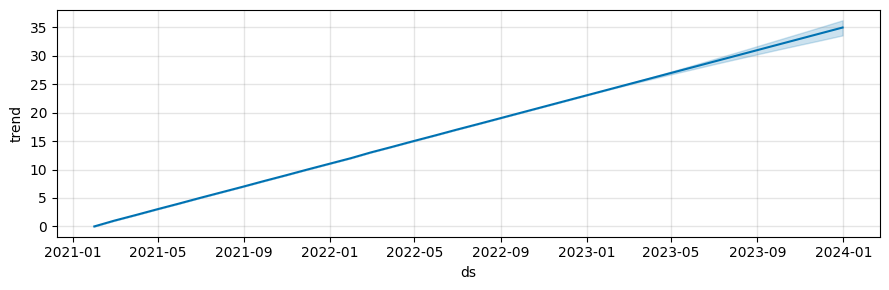

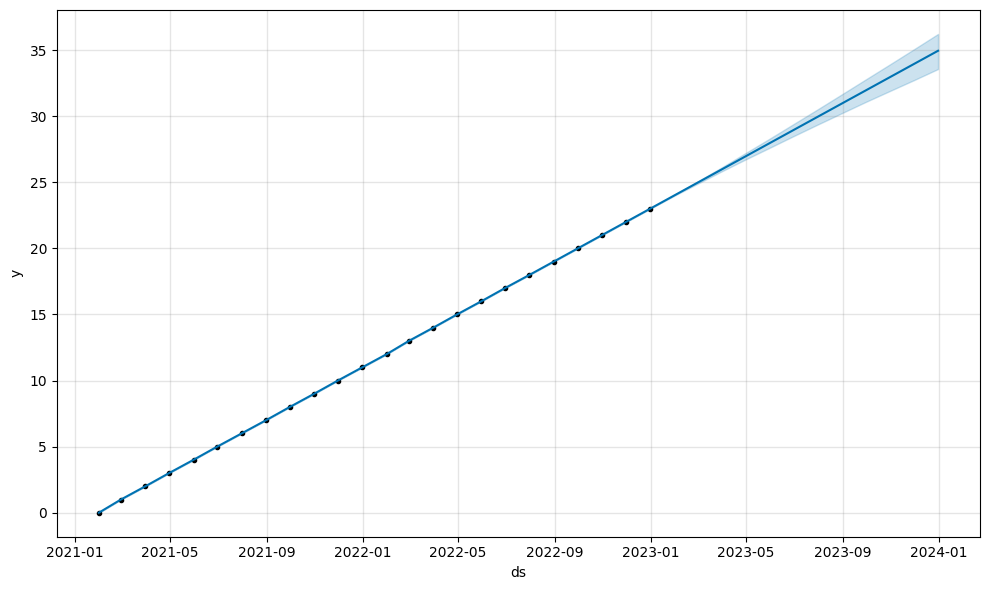

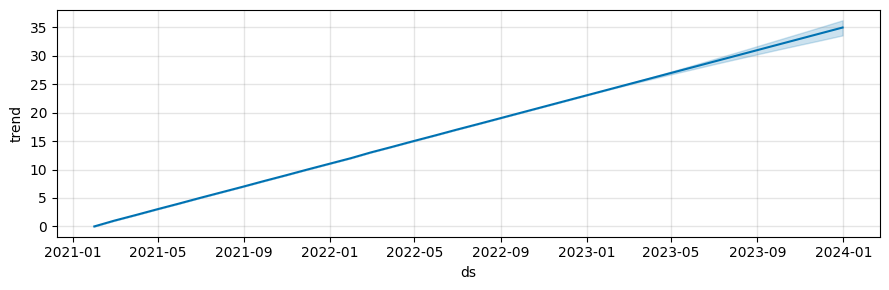

In [13]:
from prophet import Prophet
import pandas as pd

df = pd.DataFrame({
    'ds': pd.date_range('2021-01-01', periods=24, freq='M'),
    'y': range(24)
})

model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Random Forest -> MAE: 2.385, RMSE: 4.111, R²: 0.975


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


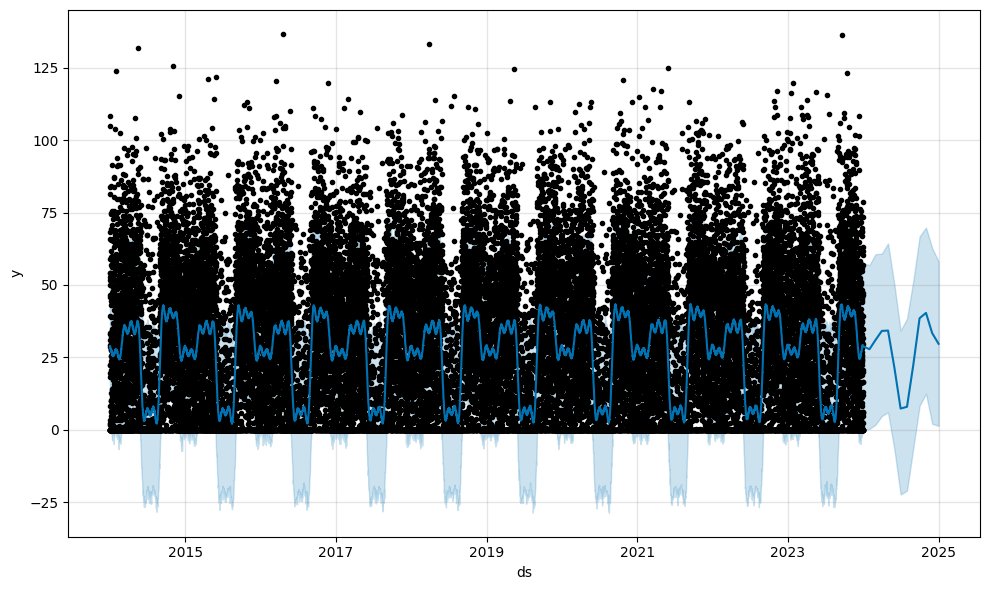

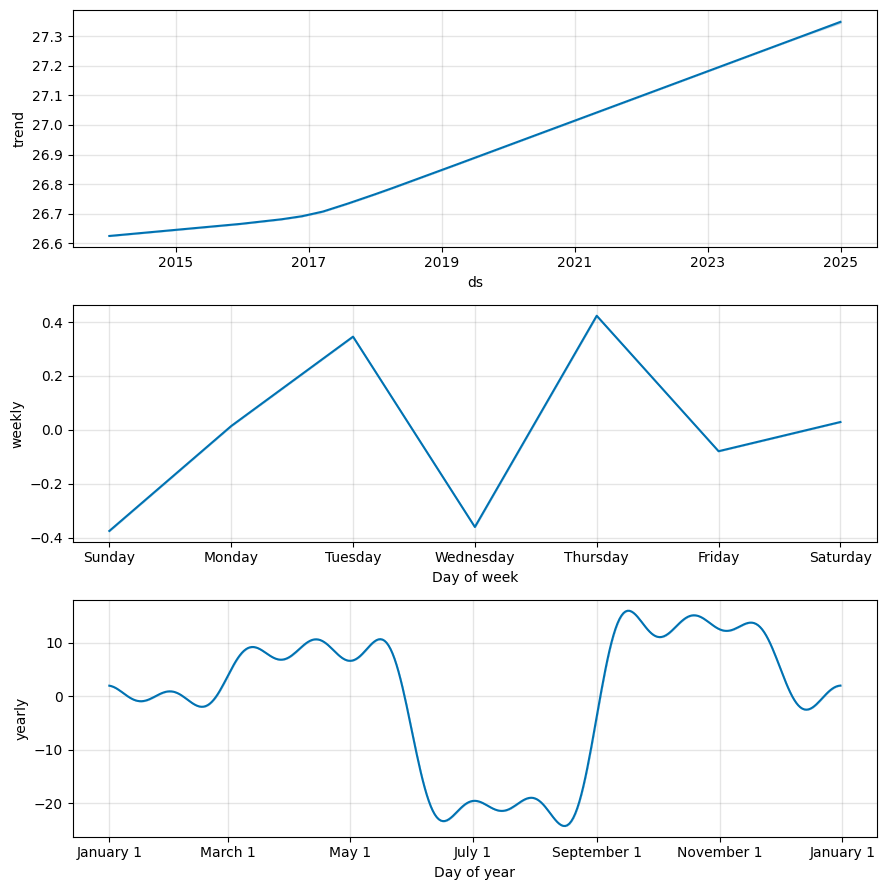

In [15]:
!pip install prophet cmdstanpy scikit-learn pandas joblib matplotlib --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from prophet import Prophet
import matplotlib.pyplot as plt

data = pd.read_csv("crop_yield_dataset.csv")
for col in data.select_dtypes(include=['object']).columns:
    if col not in ['Date']:
        data[col] = LabelEncoder().fit_transform(data[col])

X = data.drop(columns=['Crop_Yield', 'Date'])
y = data['Crop_Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "crop_yield_model.pkl")

loaded_model = joblib.load("crop_yield_model.pkl")
preds = loaded_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"Random Forest -> MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

prophet_data = data[['Date', 'Crop_Yield']].rename(columns={'Date': 'ds', 'Crop_Yield': 'y'})
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'], errors='coerce')
prophet_data = prophet_data.dropna(subset=['ds'])

prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

fig1 = prophet_model.plot(forecast)
fig2 = prophet_model.plot_components(forecast)
plt.show()


In [16]:
!pip install prophet cmdstanpy scikit-learn pandas joblib matplotlib --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from prophet import Prophet
import matplotlib.pyplot as plt

data = pd.read_csv("crop_yield_dataset.csv")
for col in data.select_dtypes(include=['object']).columns:
    if col not in ['Date']:
        data[col] = LabelEncoder().fit_transform(data[col])

X = data.drop(columns=['Crop_Yield', 'Date'])
y = data['Crop_Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "crop_yield_rf_model.pkl")

loaded_rf = joblib.load("crop_yield_rf_model.pkl")
rf_preds = loaded_rf.predict(X_test)

mae = mean_absolute_error(y_test, rf_preds)
rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
r2 = r2_score(y_test, rf_preds)
print(f"Random Forest -> MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

prophet_data = data[['Date', 'Crop_Yield']].rename(columns={'Date': 'ds', 'Crop_Yield': 'y'})
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'], errors='coerce')
prophet_data = prophet_data.dropna(subset=['ds'])

prophet_model = Prophet()
prophet_model.fit(prophet_data)
joblib.dump(prophet_model, "crop_yield_prophet_model.pkl")

loaded_prophet = joblib.load("crop_yield_prophet_model.pkl")
future = loaded_prophet.make_future


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Random Forest -> MAE: 2.385, RMSE: 4.111, R²: 0.975


AttributeError: 'Prophet' object has no attribute 'make_future'

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


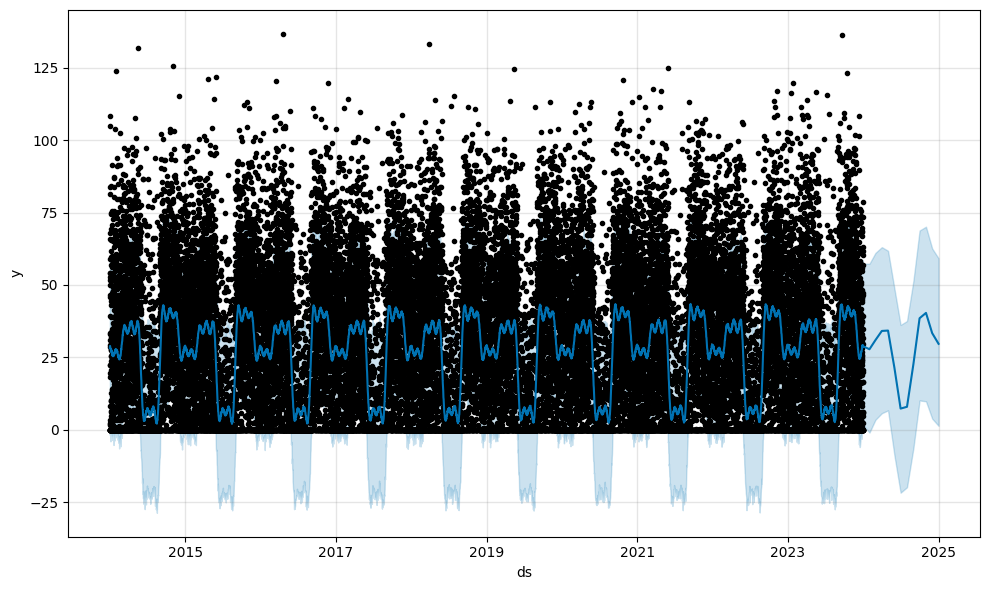

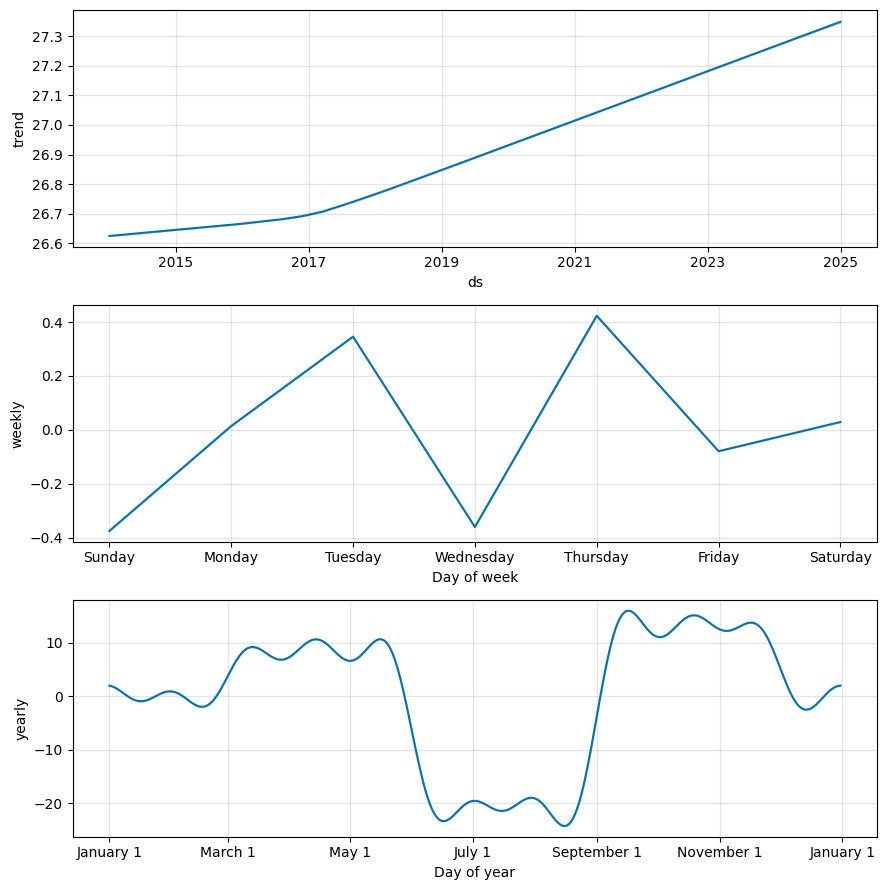

In [17]:
loaded_prophet = joblib.load("crop_yield_prophet_model.pkl")
future = loaded_prophet.make_future_dataframe(periods=12, freq='M')
forecast = loaded_prophet.predict(future)

fig1 = loaded_prophet.plot(forecast)
fig2 = loaded_prophet.plot_components(forecast)
plt.show()
